# MNIST Hand Written Digits in Unsupervised Setting

Mnist is supervised classification problem, and we converted it to an unsupervised problrm only to check if it gives any kind of good result and it is doing quite a descent job.<br>
We can more better res


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn import manifold
%matplotlib inline


In [6]:
data = pd.read_csv('train.csv/train.csv')

In [ ]:
pixel_values, targets = data
targets = targets.astype(int)

In [7]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
train_labels = data.label

In [27]:
train_features = data.drop('label',axis=1)

In [29]:
train_features.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
train_features = train_features.values

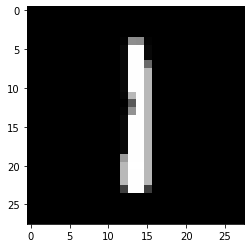

In [35]:
single_image = train_features[2,:].reshape(28,28)
plt.imshow(single_image,cmap='gray')

In [36]:
train_labels = train_labels.values

In [37]:
train_labels[2]

1

In [39]:
tsne = manifold.TSNE(n_components=2,random_state=42)
transformed_data =tsne.fit_transform(train_features[:5000,:])

In [42]:
tsne_df = pd.DataFrame(np.column_stack((transformed_data,train_labels[:5000])),columns=["x","y","targets"])
tsne_df.loc[:,"targets"] = tsne_df.targets.astype(int)

In [43]:
tsne_df

,x,y,targets
0,69.546806,9.410419,1
1,8.633895,-80.609489,0
2,32.125019,32.753780,1
3,-67.923988,2.040589,4
4,9.769373,-80.545807,0
...,...,...,...
4995,46.765190,-32.492641,2
4996,-28.652155,-5.823836,5
4997,25.216946,16.191000,8
4998,-7.263431,65.704659,7


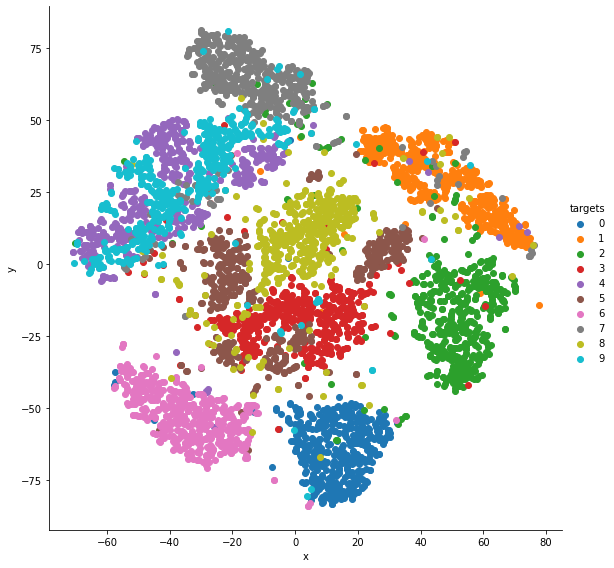

In [45]:
grid = sns.FacetGrid(tsne_df,hue="targets",size=8)
grid.map(plt.scatter,"x","y").add_legend()